In [1]:
import os
def create_folder_if_not_exists(folder_path):
    """
    Creates a folder if it does not exist.

    :param folder_path: Path of the folder to create
    """
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created.")
    else:
        print(f"Folder '{folder_path}' already exists.")
        
def file_exists(file_path):
    """
    Checks if a file exists.

    :param file_path: Path of the file to check
    :return: True if the file exists, False otherwise
    """
    return os.path.isfile(file_path)

folder_path = 'synthetique_databases'
create_folder_if_not_exists(folder_path)

Folder 'synthetique_databases' already exists.


In [2]:
def repr(i):
    if type(i) == int:
        return str(i)
    else:
        return str(i[0])+"_"+str(i[1])

In [3]:
#generate ER graphs
import networkx as nx
import math
nb_nodes = 1024
nb_graphs_er = 5
list_er = [i for i in range(2, nb_graphs_er+2)]
for i in list_er:
    g = nx.fast_gnp_random_graph(nb_nodes, (math.log(nb_nodes)*i)/nb_nodes )
    file_path = folder_path + "/er_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [4]:
#generate BA graphs
nb_graphs_ba = 3
list_ba = [i for i in range(2, nb_graphs_ba+2)]
for i in list_ba:
    g = nx.barabasi_albert_graph(nb_nodes, i)
    file_path = folder_path + "/ba_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [5]:
#generate grid graph
list_grid = [ (32,32), (4,256), (16,64) ]
for i in list_grid:
    g = nx.grid_2d_graph(i[0],i[1])
    g = nx.convert_node_labels_to_integers(g)
    file_path = folder_path + "/gr_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [6]:
l = [("er", i) for i in range(2, nb_graphs_er+2)]
l += [("ba", i) for i in range(2, nb_graphs_ba+2)]
l += [ ("gr", e) for e in list_grid ]

In [7]:
#launch pre-computations
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
j = 0
for x in l:
    i = x[1]
    print(i)
    file_path = folder_path + "/" + x[0] +"_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    #g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    for alg in algos:
        print("filepath : ",file_path)
        subprocess.run(["./main", file_path ,"u", alg, str(0), str(1), str(1), 'c']) 
    j += 1

2
filepath :  synthetique_databases/er_1024_2.edges
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing.....
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.004000 ms.
42 operations.
end queries
filepath :  synthetique_databases/er_1024_2.edges
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing.....
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.004000 ms.
42 operations.
end queries
filepath :  synthetique_databases/er_1024_2.edges
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing.....
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************

Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing.....
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.004000 ms.
16 operations.
end queries
3
filepath :  synthetique_databases/ba_1024_3.edges
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing.....
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.005000 ms.
17 operations.
end queries
filepath :  synthetique_databases/ba_1024_3.edges
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing.....
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.004000 ms

In [8]:
import random
def random_pairs(n, g, max_tries = 1000):
    V = g.nodes()
    res = []
    nb = 0
    tr = 0
    while nb <n and tr < max_tries:
        pair = random.sample(V, k = 2)
        if nx.has_path(g,pair[0],pair[1]):
            res.append(pair)
            nb += 1
        tr+=1
    if tr == max_tries:
        return -1
    return res

def random_pairs_exact(n, V):
    res = []
    for i in range(n):
        pair = random.sample(V, k = 2)
        res.append(pair)
    return res

def read_float_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return float(value)
    
    
def read_integer_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return int(value)
    
import numpy as np

def calculate_mean_and_std(array):
    """
    Calculates the mean and standard deviation of an array.

    :param array: Input array
    :return: A tuple containing mean and standard deviation
    """
    mean = np.mean(array)
    std_dev = np.std(array)
    return mean, std_dev

In [9]:
def read_integers_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    integers = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            integers.append(int(line.strip()))
    return integers

def read_floats_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    doubles = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            doubles.append(float(line.strip()))
    return doubles

distances = dict()
d_dist = dict()
for x in l:
    i = x[1]
    print(i)
    distances[x[0]+ "_"+repr(i)] = dict()
    d_dist[x[0]+ "_"+repr(i)] = dict()
    for j in range(nb_nodes):
        file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + "_b-unrank/distances_" + str(j) + ".csv"
        ll = read_integers_from_file(file_path)
        for z in range(len(ll)):
            if ll[z] in d_dist[x[0]+ "_"+repr(i)]:
                d_dist[x[0]+ "_"+repr(i)][ll[z]].append((j,z))
            else:
                d_dist[x[0]+ "_"+repr(i)][ll[z]] = [(j,z)]
            distances[x[0]+ "_"+repr(i)][(j,z)] = ll[z]
            distances[x[0]+ "_"+repr(i)][(z,j)] = ll[z]

2
3
4
5
6
2
3
4
(32, 32)
(4, 256)
(16, 64)


In [10]:
#launch simulations on er query time on average
pair_dist = "average"
nb_queries_per_pair = 50000
nb_pairs = 40
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
d = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    i = x[1]
    file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    V = list(g.nodes())
    ll = random_pairs(nb_pairs, g)
    if ll == -1:
        print("problem pair sampling")
        break
    for e in ll:
        for alg in algos:
            subprocess.run(["./main", file_path ,"u", alg, e[0], e[1], str(nb_queries_per_pair), "c"])
            file =  x[0]+ "_" + str(nb_nodes) + "_" + repr(i) + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
            d[x][alg].append(read_integer_from_file(folder_path + "/" + file)/(nb_queries_per_pair * distances[x[0]+ "_"+repr(i)][(int(e[0]),int(e[1]))] ))
            

/tmp/ipykernel_4814/3500296810.py:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  pair = random.sample(V, k = 2)


Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
11.289000 ms.
2473090 operations.
end queries
val 2473090
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
9.510000 ms.
2473090 operations.
end queries
val 2473090
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
9.022000 ms.
2716222 operations.
end queries
val 2716222
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations n

Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
11.276000 ms.
1700000 operations.
end queries
val 1700000
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
8.104000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
5.541000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations n

Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
5.794000 ms.
1250000 operations.
end queries
val 1250000
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
7.625000 ms.
1250000 operations.
end queries
val 1250000
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
6.299000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations no

Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
14.863000 ms.
1700000 operations.
end queries
val 1700000
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
9.632000 ms.
1850000 operations.
end queries
val 1850000
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
7.436000 ms.
1850000 operations.
end queries
val 1850000
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations n

Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
8.637000 ms.
1974430 operations.
end queries
val 1974430
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
9.583000 ms.
1974430 operations.
end queries
val 1974430
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations not time
7.605000 ms.
2099772 operations.
end queries
val 2099772
Graph name : synthetique_databases/er_1024_2
Number of nodes : 1024 number of edges : 7197
preprocessing for this type is already present
start queries
******************************
count operations no

Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operations not time
10.482000 ms.
1250000 operations.
end queries
val 1250000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operations not time
7.918000 ms.
1250000 operations.
end queries
val 1250000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operations not time
6.734000 ms.
1475105 operations.
end queries
val 1475105
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operatio

Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operations not time
10.375000 ms.
1700000 operations.
end queries
val 1700000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operations not time
6.534000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operations not time
6.211000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operatio

Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operations not time
10.581000 ms.
1700000 operations.
end queries
val 1700000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operations not time
6.126000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operations not time
5.189000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operatio

Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operations not time
12.892000 ms.
1700000 operations.
end queries
val 1700000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operations not time
6.947000 ms.
1475105 operations.
end queries
val 1475105
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operations not time
5.789000 ms.
1475105 operations.
end queries
val 1475105
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10589
preprocessing for this type is already present
start queries
******************************
count operatio

Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
16.454000 ms.
3739875 operations.
end queries
val 3739875
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
12.436000 ms.
3502345 operations.
end queries
val 3502345
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
9.617000 ms.
3257011 operations.
end queries
val 3257011
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operati

Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
15.884000 ms.
3577621 operations.
end queries
val 3577621
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
12.280000 ms.
1700000 operations.
end queries
val 1700000
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
13.834000 ms.
2870520 operations.
end queries
val 2870520
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operat

Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
12.311000 ms.
3884445 operations.
end queries
val 3884445
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
10.850000 ms.
3497895 operations.
end queries
val 3497895
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
10.394000 ms.
3566984 operations.
end queries
val 3566984
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operat

Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
20.063000 ms.
1700000 operations.
end queries
val 1700000
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
10.916000 ms.
3758300 operations.
end queries
val 3758300
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
10.393000 ms.
3453750 operations.
end queries
val 3453750
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operat

Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
9.706000 ms.
3268429 operations.
end queries
val 3268429
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14099
preprocessing for this type is already present
start queries
******************************
count operations not time
9.705000 ms.
1700000 operations.
end queries
val 1700000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operations not time
5.913000 ms.
1599760 operations.
end queries
val 1599760
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operations not time
6.801000 ms.
1599760 operations.
end queries
val 1599760
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operations not time
7.926000 ms.
1899700 operations.
end queries
val 1899700
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operations not time
12.863000 ms.
1250000 operations.
end queries
val 1250000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operatio

Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operations not time
8.541000 ms.
1250000 operations.
end queries
val 1250000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operations not time
10.072000 ms.
1250000 operations.
end queries
val 1250000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operations not time
12.852000 ms.
4038000 operations.
end queries
val 4038000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operati

Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operations not time
6.133000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operations not time
6.189000 ms.
1250000 operations.
end queries
val 1250000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operations not time
7.246000 ms.
1250000 operations.
end queries
val 1250000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operations not time
8.004000 ms.
1250000 operations.
end queries
val 1250000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operations not time
7.531000 ms.
1250000 operations.
end queries
val 1250000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operations not time
6.391000 ms.
1599760 operations.
end queries
val 1599760
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17680
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
7.741000 ms.
1475105 operations.
end queries
val 1475105
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
8.601000 ms.
1475105 operations.
end queries
val 1475105
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
8.823000 ms.
1650042 operations.
end queries
val 1650042
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
12.386000 ms.
4372625 operations.
end queries
val 4372625
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
10.422000 ms.
3793598 operations.
end queries
val 3793598
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
10.323000 ms.
1700000 operations.
end queries
val 1700000
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operat

Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
6.414000 ms.
1475105 operations.
end queries
val 1475105
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
10.471000 ms.
1475105 operations.
end queries
val 1475105
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
7.158000 ms.
1650042 operations.
end queries
val 1650042
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operatio

Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
9.176000 ms.
1250000 operations.
end queries
val 1250000
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
7.119000 ms.
1475105 operations.
end queries
val 1475105
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
5.893000 ms.
1475105 operations.
end queries
val 1475105
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
6.844000 ms.
1650042 operations.
end queries
val 1650042
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21062
preprocessing for this type is already present
start queries
******************************
count operations not time
8.163000 ms.
1250000 operations.
end queries
val 1250000
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations not time
11.472000 ms.
2516005 operations.
end queries
val 2516005
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations

Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations not time
26.634000 ms.
2600000 operations.
end queries
val 2600000
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations not time
19.570000 ms.
4197660 operations.
end queries
val 4197660
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations not time
17.847000 ms.
4053880 operations.
end queries
val 4053880
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations

Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations not time
11.424000 ms.
2872210 operations.
end queries
val 2872210
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations not time
13.506000 ms.
3565504 operations.
end queries
val 3565504
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations not time
12.503000 ms.
2150000 operations.
end queries
val 2150000
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations

Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations not time
8.754000 ms.
1850000 operations.
end queries
val 1850000
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations not time
12.343000 ms.
1700000 operations.
end queries
val 1700000
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations not time
11.202000 ms.
1700000 operations.
end queries
val 1700000
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations 

Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations not time
10.946000 ms.
2350000 operations.
end queries
val 2350000
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations not time
8.818000 ms.
2150000 operations.
end queries
val 2150000
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations not time
12.661000 ms.
2150000 operations.
end queries
val 2150000
Graph name : synthetique_databases/ba_1024_2
Number of nodes : 1024 number of edges : 2044
preprocessing for this type is already present
start queries
******************************
count operations 

Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations not time
14.502000 ms.
3199710 operations.
end queries
val 3199710
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations not time
13.567000 ms.
3149875 operations.
end queries
val 3149875
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations not time
15.156000 ms.
3460283 operations.
end queries
val 3460283
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations

Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations not time
13.632000 ms.
2150000 operations.
end queries
val 2150000
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations not time
11.802000 ms.
2972910 operations.
end queries
val 2972910
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations not time
11.704000 ms.
2972910 operations.
end queries
val 2972910
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations

Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations not time
15.532000 ms.
2474715 operations.
end queries
val 2474715
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations not time
10.160000 ms.
2549886 operations.
end queries
val 2549886
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations not time
12.304000 ms.
2150000 operations.
end queries
val 2150000
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations

Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations not time
20.019000 ms.
3078050 operations.
end queries
val 3078050
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations not time
11.906000 ms.
3038130 operations.
end queries
val 3038130
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations not time
12.011000 ms.
4191351 operations.
end queries
val 4191351
Graph name : synthetique_databases/ba_1024_3
Number of nodes : 1024 number of edges : 3063
preprocessing for this type is already present
start queries
******************************
count operations

Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
11.119000 ms.
1700000 operations.
end queries
val 1700000
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
13.029000 ms.
2098990 operations.
end queries
val 2098990
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
10.063000 ms.
2098990 operations.
end queries
val 2098990
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations

Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
12.008000 ms.
2098935 operations.
end queries
val 2098935
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
8.094000 ms.
2349106 operations.
end queries
val 2349106
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
9.781000 ms.
1700000 operations.
end queries
val 1700000
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations n

Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
14.025000 ms.
2150000 operations.
end queries
val 2150000
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
11.767000 ms.
3273210 operations.
end queries
val 3273210
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
11.405000 ms.
3011065 operations.
end queries
val 3011065
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations

Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
13.672000 ms.
3515435 operations.
end queries
val 3515435
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
12.031000 ms.
3964734 operations.
end queries
val 3964734
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
12.052000 ms.
2150000 operations.
end queries
val 2150000
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations

Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
44.956000 ms.
9819675 operations.
end queries
val 9819675
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
37.228000 ms.
9818070 operations.
end queries
val 9818070
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
40.789000 ms.
14448536 operations.
end queries
val 14448536
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
*****************************

gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.
gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.


val 10509910
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
val 10481075
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time


gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.


val 13605810
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
130.383000 ms.
20600000 operations.
end queries
val 20600000
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
66.353000 ms.
16948455 operations.
end queries
val 16948455
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
65.778000 ms.
16812205 operations.
end queries
val 16812205
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
***********

Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
59.405000 ms.
18496858 operations.
end queries
val 18496858
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
67.922000 ms.
10700000 operations.
end queries
val 10700000
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
52.571000 ms.
14040240 operations.
end queries
val 14040240
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
*************************

Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
35.816000 ms.
7199330 operations.
end queries
val 7199330
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
31.183000 ms.
8957822 operations.
end queries
val 8957822
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
36.271000 ms.
5750000 operations.
end queries
val 5750000
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************


gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.
gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.


val 10350000
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
val 9350000


gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.


Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
115.346000 ms.
16550000 operations.
end queries
val 16550000
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
82.325000 ms.
19513785 operations.
end queries
val 19513785
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
85.264000 ms.
19480365 operations.
end queries
val 19480365
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
************************

Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
31.272000 ms.
7304540 operations.
end queries
val 7304540
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
28.766000 ms.
7076270 operations.
end queries
val 7076270
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
40.199000 ms.
6200000 operations.
end queries
val 6200000
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************


Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
628.941000 ms.
102500000 operations.
end queries
val 102500000
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
30.180000 ms.
7810490 operations.
end queries
val 7810490
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
29.697000 ms.
7807555 operations.
end queries
val 7807555
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
**************************

Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
400.278000 ms.
152497860 operations.
end queries
val 152497860
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
554.086000 ms.
85850000 operations.
end queries
val 85850000
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
156.629000 ms.
42597010 operations.
end queries
val 42597010
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
********************

val 54097555
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
207.012000 ms.
54097555 operations.
end queries
val 54097555
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
229.197000 ms.
86025132 operations.
end queries
val 86025132
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
304.076000 ms.
48500000 operations.
end queries
val 48500000
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
*********

Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
235.423000 ms.
36800000 operations.
end queries
val 36800000
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
34.932000 ms.
9350000 operations.
end queries
val 9350000
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
34.663000 ms.
9350000 operations.
end queries
val 9350000
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
****************************

Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
233.084000 ms.
34550000 operations.
end queries
val 34550000
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
273.308000 ms.
89353300 operations.
end queries
val 89353300
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
273.091000 ms.
67846250 operations.
end queries
val 67846250
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
**********************

Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
110.868000 ms.
28969300 operations.
end queries
val 28969300
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
89.894000 ms.
23594500 operations.
end queries
val 23594500
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
98.042000 ms.
21497774 operations.
end queries
val 21497774
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
************************

Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
159.611000 ms.
31400440 operations.
end queries
val 31400440
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
96.307000 ms.
24082350 operations.
end queries
val 24082350
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
85.880000 ms.
22386774 operations.
end queries
val 22386774
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
************************

gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.
gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.


val 15569480
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
val 23137484


gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.


Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
149.771000 ms.
22850000 operations.
end queries
val 22850000
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
51.720000 ms.
13497345 operations.
end queries
val 13497345
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
51.559000 ms.
13452370 operations.
end queries
val 13452370
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
************************

Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
41.498000 ms.
8372796 operations.
end queries
val 8372796
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
43.124000 ms.
6650000 operations.
end queries
val 6650000
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
30.046000 ms.
7635005 operations.
end queries
val 7635005
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************


Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
59.158000 ms.
11538685 operations.
end queries
val 11538685
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
44.879000 ms.
13414456 operations.
end queries
val 13414456
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
52.763000 ms.
8900000 operations.
end queries
val 8900000
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
***************************

In [122]:
#launch simulations on er query time on long distance
# last third of distances
pair_dist = "long"
max_dist = { i: max(d_dist[x[0]+ "_"+repr(x[1])])  for x in l  }


nb_queries_per_pair = 500000
nb_pairs = 30
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
d = { i: {alg:[]   for alg in algos}  for i in l }

for x in l:
    i = x[1]
    file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    V = list(g.nodes())
    pairs = []
    if pair_dist == "long":
        for zz in range(int(max_dist[i]*2/3), max_dist[i]):
            pairs += d_dist[i][zz]
    if pair_dist == "medium":
        for zz in range(int(max_dist[i]*1/3), max_dist[i]*2/3):
            pairs += d_dist[i][zz]
    if pair_dist == "short":
        for zz in range(int(max_dist[i]), max_dist[i]*1/3):
            pairs += d_dist[i][zz]
    ll = random_pairs_exact(nb_pairs, pairs)
    if ll == -1:
        print("problem pair sampling")
        break
    for e in ll:
        for alg in algos:
            subprocess.run(["./main", file_path ,"u", alg, str(e[0]), str(e[1]), str(nb_queries_per_pair), "c"])
            file = "er_" + str(nb_nodes) + "_" + str(i) + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
            d[x][alg].append(read_integer_from_file(folder_path + "/" + file))
            

KeyError: 2

In [190]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart(data, xlabel, ylabel, legend, filename):
    """
    Plots a bar chart where the x-axis is represented by the keys of the dictionary.
    Each key in the dictionary maps to another dictionary with 4 keys representing bars.
    The values are tuples (mean, standard deviation).

    :param data: Dictionary containing the data to plot
    """

    categories = list(data.keys())
    subcategories = list(next(iter(data.values())).keys())
    
    # Number of groups and bars per group
    n_groups = len(categories)
    n_bars = len(subcategories)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Create figure and axis
    #fig, ax = plt.subplots()

    # Bar width
    bar_width = 0.15

    # X locations for the groups
    index = np.arange(n_groups)
    
    # Iterate through each subcategory and plot the bars
    for i, subcategory in enumerate(subcategories):
        means = [data[category][subcategory][0] for category in categories]
        std_devs = [data[category][subcategory][1] for category in categories]
        ax.bar(index + i * bar_width, means, bar_width, yerr=std_devs, label=subcategory)

    # Add labels, title, and legend
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(legend)
    ax.set_xticks(index + bar_width * (n_bars - 1) / 2)
    ax.set_xticklabels(categories)
    ax.legend()


    # Show plot
    plt.rcParams.update({'font.size': 13})
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

# # Example usage:
# data = {
#     'A': {'bar1': (5, 1), 'bar2': (6, 1.5), 'bar3': (7, 2), 'bar4': (8, 2.5)},
#     'B': {'bar1': (4, 1.2), 'bar2': (5, 1.3), 'bar3': (6, 1.8), 'bar4': (7, 2.1)},
#     'C': {'bar1': (3, 0.8), 'bar2': (4, 1.1), 'bar3': (5, 1.6), 'bar4': (6, 2.0)}
# }

# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in list_p}

# plot_bar_chart(data)

In [191]:
def name(i):
    if i[0] != "gr":
        return i[0]+"_"+str(i[1])
    else:
        return str(i[1][0])+"_"+str(i[1][1])

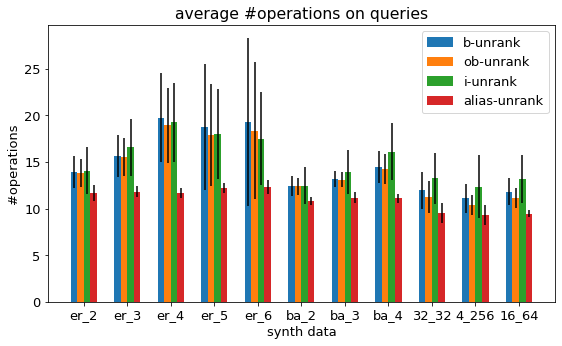

In [192]:
data = {name(i):  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in l}
plot_bar_chart(data, "synth data", "#operations", "average #operations on queries", "queries.pdf")

In [193]:
# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "synth data", "#operations", "average #operations on queries", "queries2.pdf")

In [194]:
l = [("er", i) for i in range(2, nb_graphs_er+2)]
l += [("ba", i) for i in range(2, nb_graphs_ba+2)]
l += [ ("gr", e) for e in list_grid ]

In [195]:
#launch bars on pre-computations
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
d_pre = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    i = x[1]
    for alg in algos:
        file =  x[0] +  "_" + str(nb_nodes) + "_" + repr(i) + "_" + alg + "/pre_time.csv"
        ll = read_integers_from_file(folder_path+"/"+file)
        d_pre[x][alg] = ll

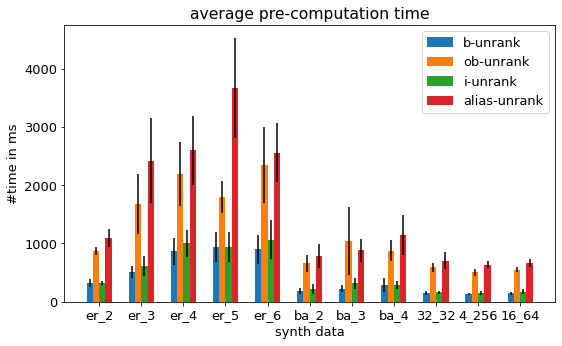

In [196]:
data = {name(i):  { e: calculate_mean_and_std(d_pre[i][e])   for e in algos }  for i in l}
plot_bar_chart(data, "synth data", "#time in ms", "average pre-computation time", "pre_comp.pdf")

In [160]:
# data = {i[0]+"_"+repr(i[1]):  { e: calculate_mean_and_std(d_pre[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "er, p = (xlog(n)/n)", "#time in ms", "average pre-computation time", "pre_comp2.pdf")